      y      x1   x2     x3     x4   x5  x6  x7  x8  x9
0  25.9  4.9176  1.0  3.472  0.998  1.0   7   4  42   0
1  29.5  5.0208  1.0  3.531  1.500  2.0   7   4  62   0
2  27.9  4.5429  1.0  2.275  1.175  1.0   6   3  40   0
3  25.9  4.5573  1.0  4.050  1.232  1.0   6   3  54   0
4  29.9  5.0597  1.0  4.455  1.121  1.0   6   3  42   0

-----------
Normal probability plot of the residuals.



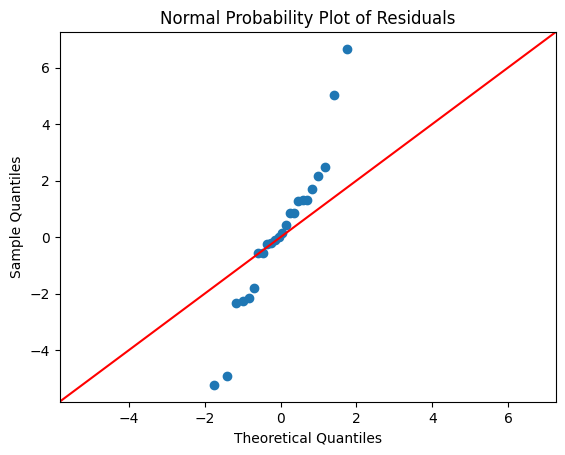


-----------

Plot of the residuals versus the predicted response.



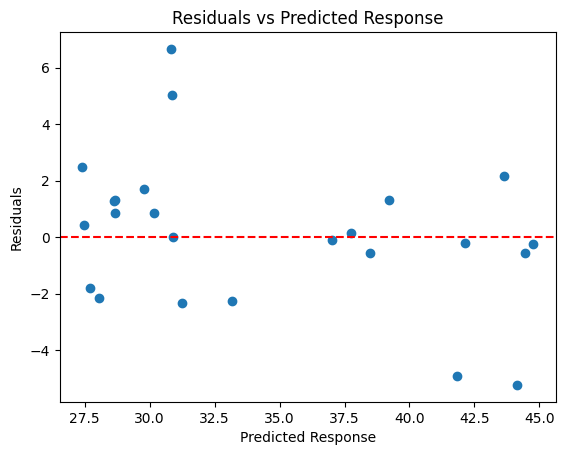


-----------


Influential Observations table

      dfb_x1    dfb_x2    dfb_x3    dfb_x4    dfb_x5    dfb_x6    dfb_x7  \
0   0.113943 -0.172823 -0.003692  0.566768 -0.089424  0.043444 -0.526354   
1   0.016036 -0.104350 -0.081679  0.120246  0.013769 -0.085832  0.094054   
2  -0.021915  0.006773 -0.049976  0.016677  0.003486  0.039139 -0.025805   
3   0.050102  0.016033  0.025566 -0.076650  0.003898 -0.087341  0.134262   
4  -0.009193  0.012949  0.004699 -0.046315 -0.014437  0.043481 -0.024774   
5  -0.304175  0.299589  0.261336 -0.285489  0.164708  0.242705 -0.165267   
6  -0.020782  0.223714  0.116807 -0.014743  0.169680 -0.365470  0.334161   
7   0.378728  0.220525 -0.923387 -0.283928  0.164814  0.002381  0.003081   
8  -0.067770 -0.009083  0.357731 -0.178105  0.001758  0.005201  0.094309   
9  -0.144015 -0.141987 -0.099618  0.364103 -0.032016  0.094234 -0.092425   
10  0.153899 -0.021001  0.004642 -0.104711 -0.123437  0.065763 -0.148694   
11 -0.000017 -0.000034 -0.000231  0.00023

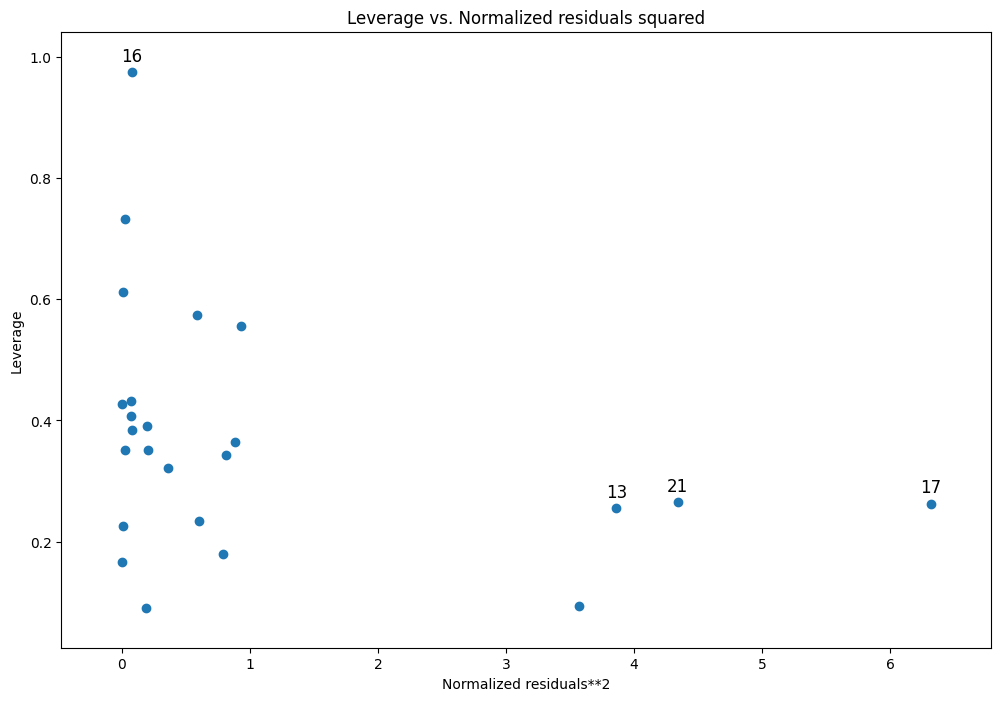


dffits_limit: 1.224744871391589 

Please pay attention to the following values:

      dfb_x1    dfb_x2    dfb_x3    dfb_x4    dfb_x5    dfb_x6    dfb_x7  \
16  0.306408 -0.226893 -0.181305 -0.083074 -4.819629 -0.136148  0.419103   
17  0.511943 -0.509284 -0.386990  0.182834  0.012582 -0.708478  0.761297   
21 -0.150876  0.036428 -0.308266  0.029106 -0.078483  0.656666 -0.658940   

      dfb_x8    dfb_x9   cooks_d  standard_resid  hat_diag  dffits_internal  \
16 -0.126416  0.268982  4.868680       -1.067804  0.974639        -6.619526   
17  0.103239  1.451531  0.222060        2.366453  0.263013         1.413696   
21 -0.025875 -0.823102  0.138814       -1.861657  0.264963        -1.117733   

    student_resid    dffits  
16      -1.073191 -6.652923  
17       2.888020  1.725276  
21      -2.051017 -1.231424  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
url = 'https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Diagnostics%20for%20leverage%20and%20influence%20(ch.6)/data(ch.6)/table-b4.csv'
df = pd.read_csv(url)

specific_columns = df[["y", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9"]]
print(specific_columns.head())

# Extract the features (X) and target variable (y) for model 1 (x6 and x7)
X = specific_columns[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9"]].values
y = specific_columns["y"].values

model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
y_pred = results.predict(X)

print("\n-----------")
print("Normal probability plot of the residuals.\n")
# Print the mathematical function of the model

sm.qqplot(residuals, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------\n")

print("Plot of the residuals versus the predicted response.\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("\nInfluential Observations table\n")
# Detect influential observations
influence = results.get_influence()
summary_table = influence.summary_frame()

# Calculate DFFITS
dffits = influence.dffits[0]

# Print the summary table of influential observations with DFFITS and DFBETAS
print(summary_table)

# Plot the Cook's distance
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)

plt.show()

# Calculate DFFITS Limit
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors
dffits_limit = 2 * np.sqrt(p / n)
print ("\ndffits_limit:",dffits_limit, "\n")

print("Please pay attention to the following values:\n")
print(summary_table[abs(summary_table['dffits']) > dffits_limit])